# Real Estate Analysis: Mexico and Brazil

## 1. Introduction

### 1.1 Project Overview  
This project involves a comparative exploratory data analysis (EDA) of real estate markets in Mexico and Brazil. As part of a broader effort to understand property value dynamics in different regions, this analysis focuses on identifying regional price differences, common property attributes, and patterns in geographical distribution. The findings will support stakeholders interested in making informed investment decisions in the Latin American real estate market.

### 1.2 Business Problem  
Investors and stakeholders in the real estate industry need insights into market conditions across different regions. Without clear understanding of price trends and property characteristics, they risk overpaying or under-investing in key markets. This project aims to bridge that gap by providing a data-driven overview of the real estate market in Mexico and Brazil.

### 1.3 Objectives  

**Main Objectives**
- Identify pricing trends by region in Mexico and Brazil  
- Analyze property characteristics and distribution  
- Provide insights to guide investment strategies  

**Minor Objectives**
- Identify states with the highest number of listings  
- Understand variation in price and area  
- Compare distribution of properties between the two countries  

### 1.4 Expected Outcomes  
By the end of this analysis, stakeholders will be able to:
- Recognize regional pricing patterns  
- Make better investment choices by identifying high- and low-price regions  
- Understand property distribution and characteristics across both countries  

## 2. Business Understanding  

The real estate market is influenced by various regional and economic factors. Understanding these variations is critical for strategic investment. Through this analysis, we provide a comparative view of the real estate environments in Mexico and Brazil using publicly available datasets.

**Stakeholders include:**
- Real estate investors  
- Property developers  
- Market analysts  
- Policy makers  

**Key Business Questions:**
- Which regions in Mexico and Brazil have the highest and lowest average prices?  
- What are the most common property features in both countries?  
- How is property price distributed across area and location?  

## 3. Data Understanding and Analysis

### 3.1 Source of Data  
The datasets were sourced from Kaggle and contain property listings with various attributes including price, location, property type, number of rooms, and surface area.

### 3.2 Description of Data  
- **Categorical Features:** Property type, operation type, region/state  
- **Numerical Features:** Price, surface area  
- **Location Data:** Latitude and longitude for mapping 

# ``A. Housing in MEXICO ``

# Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
style.use("ggplot")
import seaborn as sns
import plotly.express as px

In [2]:
# Load CSV files into DataFrames
df1 = pd.read_csv("data/mexico-real-estate-1.csv",encoding = "latin1",index_col = 0)
df2 = pd.read_csv("data/mexico-real-estate-2.csv",encoding = "latin1",index_col =0)
df3 = pd.read_csv("data/mexico-real-estate-3.csv",encoding = "latin1",index_col =0)

# Print object type and shape for DataFrames
print("df1 type:", type(df1))
print("df1 shape:", df1.shape)
print()
print("df2 type:", type(df2))
print("df2 shape:", df2.shape)
print()
print("df3 type:", type(df3))
print("df3 shape:", df3.shape)

df1 type: <class 'pandas.core.frame.DataFrame'>
df1 shape: (700, 6)

df2 type: <class 'pandas.core.frame.DataFrame'>
df2 shape: (700, 6)

df3 type: <class 'pandas.core.frame.DataFrame'>
df3 shape: (700, 5)


# Inspect the three dataframes one at a time

# DATA CLEANING 

# DATAFRAME 1

### Create a function for checking missing values 

In [3]:

def missing_values(df):
    return df.isna().sum()

In [4]:
# Inspect df1 to see if it has missing values or wrong datatypes
print(df1.shape)
df1.info()
df1.head()


(700, 6)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 1 to 700
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  700 non-null    object 
 1   state          700 non-null    object 
 2   lat            583 non-null    float64
 3   lon            583 non-null    float64
 4   area_m2        700 non-null    int64  
 5   price_usd      700 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 38.3+ KB


,property_type,state,lat,lon,area_m2,price_usd
1,house,Estado de México,19.560181,-99.233528,150,"$67,965.56"
2,house,Nuevo León,25.688436,-100.198807,186,"$63,223.78"
3,apartment,Guerrero,16.767704,-99.764383,82,"$84,298.37"
4,apartment,Guerrero,16.829782,-99.911012,150,"$94,308.80"
5,house,Veracruz de Ignacio de la Llave,NaN,NaN,175,"$94,835.67"


In [5]:
# Check missing values in df1
missing_values(df1)

property_type      0
state              0
lat              117
lon              117
area_m2            0
price_usd          0
dtype: int64

- lat and lot columns have missing values 
- price_usd has $ and , which need to be removed
- price_usd is stored as  an object instead of integer so we need to cast it 

In [6]:
## Data cleaning of df1
# Remove $ and , from the price_usd and cast it to an i nteger 
df1["price_usd"] = (df1["price_usd"].str.replace("$","",regex =False)
                    .str.replace(",","")
                    .astype(float)
)
df1.head()

,property_type,state,lat,lon,area_m2,price_usd
1,house,Estado de México,19.560181,-99.233528,150,67965.56
2,house,Nuevo León,25.688436,-100.198807,186,63223.78
3,apartment,Guerrero,16.767704,-99.764383,82,84298.37
4,apartment,Guerrero,16.829782,-99.911012,150,94308.80
5,house,Veracruz de Ignacio de la Llave,NaN,NaN,175,94835.67


In [7]:
# Drop all the missing values in lat and lon columns
df1.dropna(inplace= True)

# Confirm tdf1 has no missing values
missing_values(df1)


property_type    0
state            0
lat              0
lon              0
area_m2          0
price_usd        0
dtype: int64

- df1 is now clean for analysis

# DATAFRAME 2

In [8]:
# Inspect df1 to see if it has missing values or wrong datatypes
print(df2.shape)
df2.info()
df2.head()

(700, 6)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 1 to 700
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  700 non-null    object 
 1   state          700 non-null    object 
 2   lat            571 non-null    float64
 3   lon            571 non-null    float64
 4   area_m2        700 non-null    int64  
 5   price_mxn      700 non-null    int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 38.3+ KB


,property_type,state,lat,lon,area_m2,price_mxn
1,apartment,Nuevo León,25.721081,-100.345581,72,1300000
2,apartment,Puebla,NaN,NaN,190,2500000
3,house,Morelos,23.634501,-102.552788,360,5300000
4,house,Morelos,NaN,NaN,76,820000
5,house,Puebla,NaN,NaN,200,1100000


In [9]:
# Check missing values in df1
missing_values(df2)

property_type      0
state              0
lat              129
lon              129
area_m2            0
price_mxn          0
dtype: int64

- lat and lon have missing values
- The price is in mexican peso so we need to convert it to usd  so as to be able to compare it with the price in df1

In [10]:
# Convert mxn peso  to usd  considering that when this data was collected in 2014, a dollar cost 19 pesos.
df2['price_usd'] =df2['price_mxn']/19
df2.head()

,property_type,state,lat,lon,area_m2,price_mxn,price_usd
1,apartment,Nuevo León,25.721081,-100.345581,72,1300000,68421.052632
2,apartment,Puebla,NaN,NaN,190,2500000,131578.947368
3,house,Morelos,23.634501,-102.552788,360,5300000,278947.368421
4,house,Morelos,NaN,NaN,76,820000,43157.894737
5,house,Puebla,NaN,NaN,200,1100000,57894.736842


In [11]:
# drop  all rows with missing values and also drop the price_mxn column
df2.dropna(inplace = True)
df2.drop("price_mxn",axis = 1, inplace = True)
df2.head()

,property_type,state,lat,lon,area_m2,price_usd
1,apartment,Nuevo León,25.721081,-100.345581,72,68421.052632
3,house,Morelos,23.634501,-102.552788,360,278947.368421
7,apartment,Estado de México,19.272040,-99.572013,85,65789.473684
8,house,San Luis Potosí,22.138882,-100.996510,158,111578.947368
9,apartment,Distrito Federal,19.394558,-99.129707,65,39904.736842


In [12]:
# confirm that df2 has no missing values
missing_values(df2)

property_type    0
state            0
lat              0
lon              0
area_m2          0
price_usd        0
dtype: int64

- df2 is now free from missing values

# DATAFRAME 3

In [13]:
# Inspect df1 to see if it has missing values or wrong datatypes
print(df3.shape)
df3.info()
df3.head()

(700, 5)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 1 to 700
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   property_type            700 non-null    object 
 1   place_with_parent_names  700 non-null    object 
 2   lat-lon                  582 non-null    object 
 3   area_m2                  700 non-null    int64  
 4   price_usd                700 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 32.8+ KB


,property_type,place_with_parent_names,lat-lon,area_m2,price_usd
1,apartment,|México|Distrito Federal|Gustavo A. Madero|Acu...,"19.52589,-99.151703",71,48550.59
2,house,|México|Estado de México|Toluca|Metepec|,"19.2640539,-99.5727534",233,168636.73
3,house,|México|Estado de México|Toluca|Toluca de Lerd...,"19.268629,-99.671722",300,86932.69
4,house,|México|Morelos|Temixco|Burgos Bugambilias|,NaN,275,263432.41
5,apartment,|México|Veracruz de Ignacio de la Llave|Veracruz|,"19.511938,-96.871956",84,68508.67


In [14]:
# Check missing values in df1
missing_values(df3)

property_type                0
place_with_parent_names      0
lat-lon                    118
area_m2                      0
price_usd                    0
dtype: int64

- place_with_parent_names & lat-lon ned to be split and casted to a float
- dropna to drop missing values and alo drop (place_with_parent_name &lat-lon)



In [15]:
# Split lat-lon column to two columns 'lat' and 'lon'
df3[["lat","lon"]] = df3["lat-lon"].str.split(",",expand = True).astype(float)
df3.head()


,property_type,place_with_parent_names,lat-lon,area_m2,price_usd,lat,lon
1,apartment,|México|Distrito Federal|Gustavo A. Madero|Acu...,"19.52589,-99.151703",71,48550.59,19.525890,-99.151703
2,house,|México|Estado de México|Toluca|Metepec|,"19.2640539,-99.5727534",233,168636.73,19.264054,-99.572753
3,house,|México|Estado de México|Toluca|Toluca de Lerd...,"19.268629,-99.671722",300,86932.69,19.268629,-99.671722
4,house,|México|Morelos|Temixco|Burgos Bugambilias|,NaN,275,263432.41,NaN,NaN
5,apartment,|México|Veracruz de Ignacio de la Llave|Veracruz|,"19.511938,-96.871956",84,68508.67,19.511938,-96.871956


In [16]:
# Extract the state for every house by splitting the (place_with_parent_names)column.The state name always appears after "México|" in each string
df3["state"]= df3["place_with_parent_names"].str.split("|",expand = True)[2]
df3.head()


,property_type,place_with_parent_names,lat-lon,area_m2,price_usd,lat,lon,state
1,apartment,|México|Distrito Federal|Gustavo A. Madero|Acu...,"19.52589,-99.151703",71,48550.59,19.525890,-99.151703,Distrito Federal
2,house,|México|Estado de México|Toluca|Metepec|,"19.2640539,-99.5727534",233,168636.73,19.264054,-99.572753,Estado de México
3,house,|México|Estado de México|Toluca|Toluca de Lerd...,"19.268629,-99.671722",300,86932.69,19.268629,-99.671722,Estado de México
4,house,|México|Morelos|Temixco|Burgos Bugambilias|,NaN,275,263432.41,NaN,NaN,Morelos
5,apartment,|México|Veracruz de Ignacio de la Llave|Veracruz|,"19.511938,-96.871956",84,68508.67,19.511938,-96.871956,Veracruz de Ignacio de la Llave


In [17]:
# Drop (place_with_parent_names and lat-lon) columns and also drop all rows with missing values
df3.dropna(inplace =True)
df3.drop(columns = ["place_with_parent_names","lat-lon"],inplace= True)
df3.head(3)

,property_type,area_m2,price_usd,lat,lon,state
1,apartment,71,48550.59,19.525890,-99.151703,Distrito Federal
2,house,233,168636.73,19.264054,-99.572753,Estado de México
3,house,300,86932.69,19.268629,-99.671722,Estado de México


In [18]:
# Confirm that df3 has no missing values
missing_values(df3)

property_type    0
area_m2          0
price_usd        0
lat              0
lon              0
state            0
dtype: int64

- df3 has no missing values

### Since df1,df2,df3 are now clean we can concatenate them to one dataframe df

## Concatenate DataFrames

In [19]:
df = pd.concat([df1,df2,df3])
df.head()

,property_type,state,lat,lon,area_m2,price_usd
1,house,Estado de México,19.560181,-99.233528,150,67965.56
2,house,Nuevo León,25.688436,-100.198807,186,63223.78
3,apartment,Guerrero,16.767704,-99.764383,82,84298.37
4,apartment,Guerrero,16.829782,-99.911012,150,94308.80
6,house,Yucatán,21.052583,-89.538639,205,105191.37


In [20]:
# Check if df has any missing values
missing_values(df)

property_type    0
state            0
lat              0
lon              0
area_m2          0
price_usd        0
dtype: int64

## Save  the clean dataframe to csv 

In [21]:
df.to_csv("data/mexico-real-estate-clean.csv",index = False)

# ``EXPLORATORY DATA ANALYSIS (EDA)``

In [22]:
# Read the clean csv file to into a dataframe 
df = pd.read_csv("data/mexico-real-estate-clean.csv")
df.head()

,property_type,state,lat,lon,area_m2,price_usd
0,house,Estado de México,19.560181,-99.233528,150,67965.56
1,house,Nuevo León,25.688436,-100.198807,186,63223.78
2,apartment,Guerrero,16.767704,-99.764383,82,84298.37
3,apartment,Guerrero,16.829782,-99.911012,150,94308.80
4,house,Yucatán,21.052583,-89.538639,205,105191.37


In [23]:
df.shape   

(1736, 6)

In [24]:
# Confirm that there are no missing values and the dataframe has the correct datatypes
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1736 entries, 0 to 1735
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  1736 non-null   object 
 1   state          1736 non-null   object 
 2   lat            1736 non-null   float64
 3   lon            1736 non-null   float64
 4   area_m2        1736 non-null   int64  
 5   price_usd      1736 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 81.5+ KB


In [25]:
df.describe()

,lat,lon,area_m2,price_usd
count,1736.000000,1736.000000,1736.000000,1736.000000
mean,20.765410,-98.798575,170.261521,115331.980800
std,2.743425,4.882553,80.594539,65426.173793
min,15.752900,-117.054763,60.000000,33157.894737
25%,19.275200,-100.392553,101.750000,65789.473684
50%,19.620518,-99.204001,156.000000,99262.132105
75%,21.073428,-98.245911,220.000000,150846.665000
max,32.665619,-86.767539,385.000000,326733.660000


- Everything is perfect now let's begin exploratory analysis

# SCATTER MAPBOX PLOT

# **1.Location Data** : to get a sense of where the  properties are located
# "lat" and "lon"

- Location is a very crucial aspect in real estate 
- lat and lon columns will help us see where in Mexico our houses are located 
- since latitude and longitude are based on a coordinate system we can visualize them by  creating  a scatter plot on top of a map 
- A great tool for this is the scatter_mapbox from the plotly library



### Visualize location data using Scatter mapbox plot

In [26]:
# Use plotly express to create figure
fig = px.scatter_mapbox(
    df,  # Our DataFrame
    lat= "lat",
    lon= "lon",
    center={"lat": 19.43, "lon": -99.13},  # Map will be centered on Mexico City
    width=600,  # Width of map
    height=600,  # Height of map
    hover_data=["price_usd"],  # Display price when hovering mouse over house
)

# Add mapbox_style to figure layout
fig.update_layout(mapbox_style="open-street-map")

# Show figure
fig.show()

 - When we zoom out We can clearly see that the houses in our dataset distributed evenly throughout the country with a considerable concentration in the centre of the country specifically around mexico city

# **2.Categorical Data**: "state"
- Even though we can get a good idea of which states are most common in our dataset from looking at a map, we can also get the exact count by using the "state" column

- Lets determine the 10 most prevalent states in our dataset using the value_counts method on the "state" column 

In [27]:
# Get the number of unique states 
df["state"].nunique()

30

In [28]:
# Display these unique states
df["state"].unique()

array(['Estado de México', 'Nuevo León', 'Guerrero', 'Yucatán',
       'Querétaro', 'Morelos', 'Chiapas', 'Tabasco', 'Distrito Federal',
       'Nayarit', 'Puebla', 'Veracruz de Ignacio de la Llave', 'Sinaloa',
       'Tamaulipas', 'Jalisco', 'San Luis Potosí', 'Baja California',
       'Hidalgo', 'Quintana Roo', 'Sonora', 'Chihuahua',
       'Baja California Sur', 'Zacatecas', 'Aguascalientes', 'Guanajuato',
       'Durango', 'Tlaxcala', 'Colima', 'Oaxaca', 'Campeche'],
      dtype=object)

In [29]:
# Get value counts of top 10  states
df["state"].value_counts().head(10)

Distrito Federal                   303
Estado de México                   179
Yucatán                            171
Morelos                            160
Querétaro                          128
Veracruz de Ignacio de la Llave    117
Puebla                              95
Nuevo León                          83
Jalisco                             60
San Luis Potosí                     55
Name: state, dtype: int64

# 3.**Numerical Data**: `"area_m2"` and `"price_usd"`

- We have a sense of where the houses in our dataset are located
- Let's determine how much they cost ( look at the price_usd) and how big  they are(look at the area_m2) by  looking at descriptive statistics

In [30]:
# Describe "area_m2", "price_usd" columns
df[["area_m2","price_usd"]].describe()

,area_m2,price_usd
count,1736.000000,1736.000000
mean,170.261521,115331.980800
std,80.594539,65426.173793
min,60.000000,33157.894737
25%,101.750000,65789.473684
50%,156.000000,99262.132105
75%,220.000000,150846.665000
max,385.000000,326733.660000


- Let's start by looking at "area_m2", the mean (115.020224) is larger than the median(103.000000) 
- Both of these statistics are supposed to give an idea of the "typical" value for the column, so why is there a difference of almost 15 m2 between them?
-  To answer this question, we need to see how house sizes are distributed in our dataset. Let's look at two ways to visualize the distribution: a histogram and a boxplot.

### A.HISTOGRAM ( see how house sizes are distributed in our dataset)

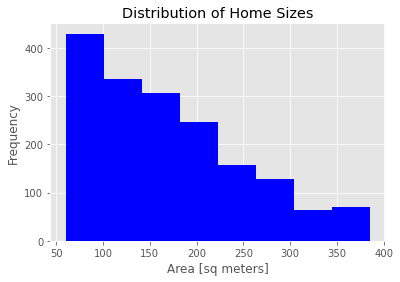

In [31]:
# Use Matplotlib to create histogram of "area_m2"
plt.hist(df["area_m2"],bins =8,color ='blue')

# Add x-axis label
plt.xlabel("Area [sq meters]")
# Add y-axis label
plt.ylabel("Frequency")
# Add title
plt.title("Distribution of Home Sizes");

- We can see that "area_m2" skews right
- There are more houses at the lower end of the distribution (50–200m2) than at the higher end (250–400m2)
- That explains the difference between the mean and the median( Mean > Median)

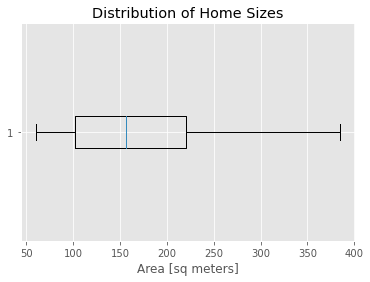

In [32]:
# Use Matplotlib to create boxplot of "area_m2"

plt.boxplot(df["area_m2"],vert = False)
# Add x-axis label
plt.xlabel("Area [sq meters]")
# Add title
plt.title("Distribution of Home Sizes");

- Distribution of home sizes is still skewed to the right


# Does "price_usd" have the same distribution as "area_m2"? Let's use the same two visualization tools to find out.

### A.Histogram of "price_usd"

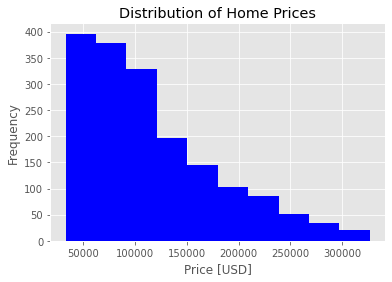

In [33]:
# Use Matplotlib to create histogram of "price_usd"
plt.hist(df["price_usd"],color ="blue")

# Add x-axis label
plt.xlabel("Price [USD]")
# Add y-axis label
plt.ylabel("Frequency")
# Add title
plt.title("Distribution of Home Prices");

The distribution of the home prices is similar to the distribution of homesize since both are skewed to the right  but for the home prices it's actually more skewed to the right

- Most houses are between  50,000 and 150,000 USD  and the reason as to why we got that originaly higher mean is  because we have larger values like 300,000 USD  (outliers) that are pulling mean  to that direction
- Mean is more affected by outliers than the median
- So we conclude that "price_usd" is even more skewed than "area_m2"
- What does this bigger skew look like in a boxplot? Lets plot an horizontal boxplot to see this

### B.Horizontal boxplot of "price_usd"

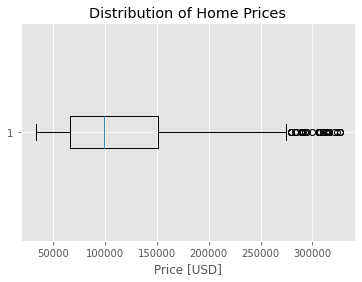

In [34]:
# Use Matplotlib to create boxplot of "price_usd"
plt.boxplot(df["price_usd"],vert=False)
# Add x-label axis
plt.xlabel("Price [USD]")
# Add y-label axis
plt.title("Distribution of Home Prices");

- Clearly shows some house prices that should be considered as outliers
- Still showing right skewed distribution

# Research Question 1
**Which state has the most expensive real estate market?**
- We will try  and see if housing prices vary by state? If so, which are the most expensive states for purchasing a home? 

In [35]:
df.head(2)

,property_type,state,lat,lon,area_m2,price_usd
0,house,Estado de México,19.560181,-99.233528,150,67965.56
1,house,Nuevo León,25.688436,-100.198807,186,63223.78


In [36]:

# Declare variable `mean_price_by_state`
mean_price_by_state = df.groupby("state")["price_usd"].mean().sort_values(ascending=False)
mean_price_by_state.head(4)


state
Querétaro           133955.913417
Guanajuato          133277.965833
Nuevo León          129221.985834
Distrito Federal    128347.267365
Name: price_usd, dtype: float64

-  Querétaro  is the most expensive state based on mean price by state but this is not the cae according to recent GDP numbers so its best to use another approach

- Lets visualize  mean_price_by_state using  a bar chart with the  states sorted from the highest to lowest mean

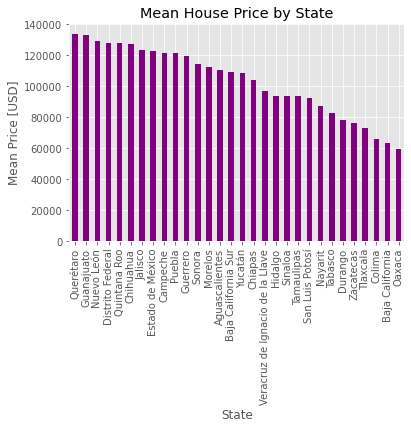

In [37]:
# USING PANDAS

# Create bar chart from `mean_price_by_state` using pandas
mean_price_by_state.plot(kind ="bar",
                        xlabel = "State",
                        ylabel = "Mean Price [USD]",
                        title = "Mean House Price by State" ,
                        color = "purple");

Text(0.5, 1.0, 'Mean House Price by State')

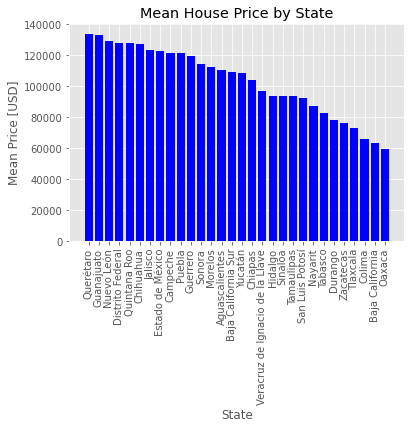

In [38]:
# using MATPLOTLIB
# Create bar chart from `mean_price_by_state` using pandas
# x axis (states)mean_price_by_state.index
# y axis (values)mean_price_by_state.values

plt.bar(mean_price_by_state.index,mean_price_by_state.values,color = 'blue')
plt.xlabel("State")
plt.ylabel("Mean Price [USD]")
plt.xticks(rotation="vertical")
plt.title("Mean House Price by State")

It seems odd that Querétaro would be the most expensive real estate market in Mexico when, according to recent GDP numbers [Mexican states GDP](https://en.wikipedia.org/wiki/List_of_Mexican_states_by_GDP), it's not in the top 10 state economies. With all the variations in house sizes across states, a better metric to look at would be price per m2. In order to do that, we need to create a new column.

- Create a new column in df called "price_per_m2". This should be the price for each house divided by it's size.

In [39]:
# Create "price_per_m2" column
df["price_per_m2"] = df.price_usd/df.area_m2

# Print object type, shape, and head
print("df type:", type(df))
print("df shape:", df.shape)
df.head()

df type: <class 'pandas.core.frame.DataFrame'>
df shape: (1736, 7)


,property_type,state,lat,lon,area_m2,price_usd,price_per_m2
0,house,Estado de México,19.560181,-99.233528,150,67965.56,453.103733
1,house,Nuevo León,25.688436,-100.198807,186,63223.78,339.912796
2,apartment,Guerrero,16.767704,-99.764383,82,84298.37,1028.028902
3,apartment,Guerrero,16.829782,-99.911012,150,94308.80,628.725333
4,house,Yucatán,21.052583,-89.538639,205,105191.37,513.128634


Let's redo our bar chart from above, but this time with the mean of "price_per_m2" for each state.

 First, use the groupby method to create a Series where the index contains each state in the dataset and the values correspond to the mean house price per m2 for that state. Then use the Series to create a bar chart of your results.Ensure the states are sorted from the highest to lowest mean

In [40]:
# Group `df` by "state", create bar chart of "price_per_m2"
mean_price_per_m2_by_state = df.groupby("state")["price_per_m2"].mean().sort_values(ascending = False)
mean_price_per_m2_by_state.head()

state
Distrito Federal    1175.889150
Estado de México     763.753423
Guerrero             761.557207
Jalisco              743.568106
Quintana Roo         736.455283
Name: price_per_m2, dtype: float64

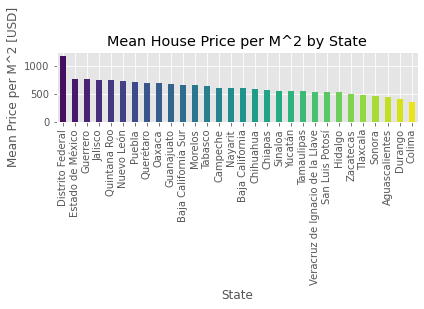

In [41]:


# Generate a color palette
colors = sns.color_palette("viridis", len(mean_price_per_m2_by_state))

# Create the bar chart
mean_price_per_m2_by_state.plot(kind='bar',
                                xlabel="State",
                                ylabel="Mean Price per M^2 [USD]",
                                title="Mean House Price per M^2 by State",
                                color=colors)

plt.tight_layout()
plt.show()

Now we see that the capital Mexico City (Distrito Federal) is by far the most expensive market  and many of the top 10 states by GDP are also in the top 10 most expensive real estate markets. So it looks like this bar chart is a more accurate reflection of state real estate markets.

## Research Question 2
- Is there a relationship between home size and price?

- From our previous question, we know that the location of a home affects its price (especially if it's in Mexico City), but what about home size? Does the size of a house influence price?

- A scatter plot can be helpful when evaluating the relationship between two columns because it lets you see if two variables are correlated — in this case, if an increase in home size is associated with an increase in price.

# Create scatter plot of "price_usd" vs "area_m2"

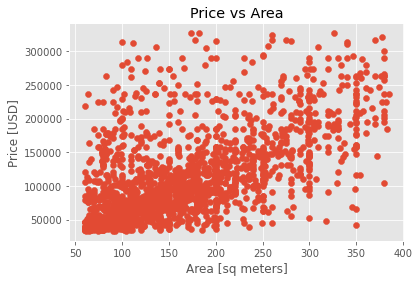

In [42]:
# Create scatter plot of "price_usd" vs "area_m2"

#df.plot.scatter("area_m2","price_usd")
plt.scatter(x=df["area_m2"], y= df["price_usd"])
# Add x-axis label

plt.xlabel("Area [sq meters]")
# Add y-axis label

plt.ylabel("Price [USD]")
# Add title
plt.title("Price vs Area");

- While there's a good amount of variation, there's definitely a positive correlation 
— The bigger the house, the higher the price. But how can we quantify this correlation?

- Using the corr method, calculate the Pearson correlation coefficient for "area_m2" and "price_usd"

In [43]:
# Calculate correlation of "price_usd" and "area_m2"
p_correlation = df["area_m2"].corr(df['price_usd'])

# Print correlation coefficient
print("Correlation of 'area_m2' and 'price_usd' (all Mexico):", p_correlation)

Correlation of 'area_m2' and 'price_usd' (all Mexico): 0.5855182454266905


- The correlation coefficient is over 0.5, so there's a moderate relationship betwween the house size and price in Mexico. But does this relationship hold true in every state? Let's look at a couple of states, starting with Morelos

### Morelos

- Create a new DataFrame named df_morelos including all the houses from df that are in the state of Morelos

In [44]:
# Declare variable `df_morelos` by subsetting `df`
df_morelos = df[df['state']=='Morelos']

df_morelos.head(2)

,property_type,state,lat,lon,area_m2,price_usd,price_per_m2
6,house,Morelos,18.812605,-98.954826,281,151509.56,539.179929
9,house,Morelos,18.804197,-98.932816,117,63223.78,540.374188


 - Using df_morelos, create a scatter plot that shows price vs area

Text(0.5, 1.0, 'Morelos: Price vs. Area')

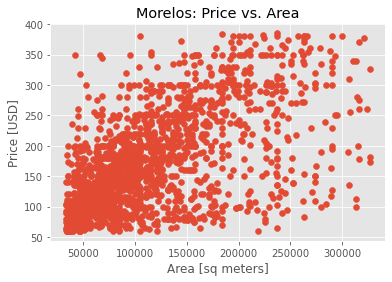

In [45]:
# Create scatter plot of "price_usd" vs "area_m2" in Morelos
plt.scatter(x = df['price_usd'], y = df['area_m2'])

# Add x-axis label
plt.xlabel("Area [sq meters]")
# Add y-axis label
plt.ylabel("Price [USD]")
# Add title
plt.title("Morelos: Price vs. Area")

- It looks like the correlation is even stronger within Morelos. Let's calculate the correlation coefficient and verify that that's the case

In [46]:
# Calculate correlation of "price_usd" and "area_m2" in `df_morelos`
p_correlation = df['area_m2'].corr(df['price_usd'])

# Print correlation coefficient
print("Correlation of 'area_m2' and 'price_usd' (Morelos):", p_correlation)

Correlation of 'area_m2' and 'price_usd' (Morelos): 0.5855182454266905


- With a correlation coefficient that high, we can say that there's a strong relationship between house size and price in Morelos

- To conclude, let's look at the capital Mexico City (Distrito Federal)

- Create a new DataFrame called df_mexico_city that includes all the observations from df that are part of the Distrito Federal
- Create a scatter plot that shows price vs area
- Calculate the correlation coefficient for "area_m2" and "price_usd" in df_mexico_city

Correlation of 'area_m2' and 'price_usd' (Mexico City): 0.4107039205853437


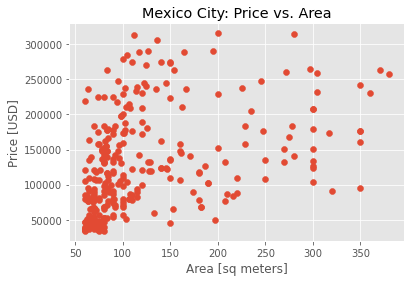

In [47]:
# Declare variable `df_mexico_city` by subsetting `df`
df_mexico_city = df[df['state']=='Distrito Federal']


# Create a scatter plot "price_usd" vs "area_m2" in Distrito Federal
plt.scatter(df_mexico_city["area_m2"], df_mexico_city["price_usd"])  

# Add x-axis label
plt.xlabel("Area [sq meters]") 

# Add y-axis label
plt.ylabel("Price [USD]")  

# Add title
plt.title("Mexico City: Price vs. Area")  

# Calculate correlation of "price_usd" and "area_m2" in `df_mexico_city`
p_correlation = df_mexico_city["area_m2"].corr(df_mexico_city["price_usd"]) 

# Print correlation coefficient
print("Correlation of 'area_m2' and 'price_usd' (Mexico City):", p_correlation)

- Looking at the scatter plot and correlation coefficient, there's see a weak relationship between size and price
#### INTERPRETATION

- The relationship we see between size and price in many states doesn't hold true in the country's biggest and most economically powerful urban center because there are other factors that have a larger influence on price
## Conclusion 
- The idea of price and area being related only holds true in aggregate across the entire country and true in some states but not true in every state

# ``B.Housing in Brazil ``

## ``GOAL``

We will work with a dataset of homes for sale in Brazi to determine if there are regional differences in the real estate market. 
We will also look at southern Brazil to see if there is a relationship between home size and price, similar to what we saw with housing in some states in Mexico

# DATA PREPARATION

## 
Load the brazil real estate dataset 

In [48]:
# Load the brazil real estate 1 csv to df1
df1 = pd.read_csv("data/brasil-real-estate-1.csv",encoding = 'latin1',index_col = 0)
df1.head(4)

,property_type,place_with_parent_names,region,lat-lon,area_m2,price_usd
1,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6443051,-35.7088142",110,"$187,230.85"
2,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6430934,-35.70484",65,"$81,133.37"
3,house,|Brasil|Alagoas|Maceió|,Northeast,"-9.6227033,-35.7297953",211,"$154,465.45"
4,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.622837,-35.719556",99,"$146,013.20"


## DATA CLEANING
### Inspect the dataset 


# DATAFRAME 1

In [49]:
print(df1.shape)
df1.info()
df1.head()

(12834, 6)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 12834 entries, 1 to 12834
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   property_type            12834 non-null  object
 1   place_with_parent_names  12834 non-null  object
 2   region                   12834 non-null  object
 3   lat-lon                  11551 non-null  object
 4   area_m2                  12834 non-null  int64 
 5   price_usd                12834 non-null  object
dtypes: int64(1), object(5)
memory usage: 701.9+ KB


,property_type,place_with_parent_names,region,lat-lon,area_m2,price_usd
1,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6443051,-35.7088142",110,"$187,230.85"
2,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6430934,-35.70484",65,"$81,133.37"
3,house,|Brasil|Alagoas|Maceió|,Northeast,"-9.6227033,-35.7297953",211,"$154,465.45"
4,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.622837,-35.719556",99,"$146,013.20"
5,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.654955,-35.700227",55,"$101,416.71"


- The dataset has missing values 
- The two columns (place_with_parent_names and lat-lon) need to be split
- lat-lon                  11551 non-null  object so will need to drop the missing rows 
- Ensure that after splitting the lat-lon each column is a float instead of an object
- price_usd is an object  but should be an integer or float

In [50]:
# SPLIT THE lat -lon to lat and lon columns and cast the columns to float
df1[["lat","lon"]] = df1["lat-lon"].str.split(",",expand=True).astype(float)
df1.head()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12834 entries, 1 to 12834
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   property_type            12834 non-null  object 
 1   place_with_parent_names  12834 non-null  object 
 2   region                   12834 non-null  object 
 3   lat-lon                  11551 non-null  object 
 4   area_m2                  12834 non-null  int64  
 5   price_usd                12834 non-null  object 
 6   lat                      11551 non-null  float64
 7   lon                      11551 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 902.4+ KB


In [51]:
 df1["place_with_parent_names"]

1                      |Brasil|Alagoas|Maceió|
2                      |Brasil|Alagoas|Maceió|
3                      |Brasil|Alagoas|Maceió|
4                      |Brasil|Alagoas|Maceió|
5                      |Brasil|Alagoas|Maceió|
                         ...                  
12830               |Brasil|Pernambuco|Recife|
12831               |Brasil|Pernambuco|Recife|
12832    |Brasil|Pernambuco|Recife|Boa Viagem|
12833    |Brasil|Pernambuco|Recife|Boa Viagem|
12834    |Brasil|Pernambuco|Recife|Boa Viagem|
Name: place_with_parent_names, Length: 12834, dtype: object

In [52]:
# Split the( place_with_parent_names ) column and  create a "state" column for df1. The state name always appears after "|Brasil|" in each string

df1['state'] = df1["place_with_parent_names"].str.split("|",expand = True)[2]
df1['state']

1           Alagoas
2           Alagoas
3           Alagoas
4           Alagoas
5           Alagoas
            ...    
12830    Pernambuco
12831    Pernambuco
12832    Pernambuco
12833    Pernambuco
12834    Pernambuco
Name: state, Length: 12834, dtype: object

### Transform the "price_usd" column of df1 so that all values are floating-point numbers instead of strings.

In [53]:

df1["price_usd"]

1        $187,230.85
2         $81,133.37
3        $154,465.45
4        $146,013.20
5        $101,416.71
            ...     
12830    $174,748.79
12831    $115,459.02
12832    $137,302.62
12833    $234,038.56
12834    $168,507.77
Name: price_usd, Length: 12834, dtype: object

In [54]:
# Remove the commas,$ signs and cast the series to a float
df1["price_usd"] = (
    df1["price_usd"].str.replace("$","",regex =False)
    .str.replace(",","")
    .astype(float))

df1["price_usd"].head()


1    187230.85
2     81133.37
3    154465.45
4    146013.20
5    101416.71
Name: price_usd, dtype: float64

# DROP all rows with missing values and drop (place_with_parent_names and lat-lon)

In [55]:
df1.drop(columns = ["place_with_parent_names","lat-lon"],inplace =True)
df1.dropna(inplace =True)
df1

,property_type,region,area_m2,price_usd,lat,lon,state
1,apartment,Northeast,110,187230.85,-9.644305,-35.708814,Alagoas
2,apartment,Northeast,65,81133.37,-9.643093,-35.704840,Alagoas
3,house,Northeast,211,154465.45,-9.622703,-35.729795,Alagoas
4,apartment,Northeast,99,146013.20,-9.622837,-35.719556,Alagoas
5,apartment,Northeast,55,101416.71,-9.654955,-35.700227,Alagoas
...,...,...,...,...,...,...,...
12829,apartment,Northeast,74,134182.11,-8.044497,-34.909519,Pernambuco
12830,apartment,Northeast,91,174748.79,-8.056418,-34.909309,Pernambuco
12831,apartment,Northeast,115,115459.02,-8.137348,-34.909181,Pernambuco
12832,apartment,Northeast,76,137302.62,-8.113672,-34.896252,Pernambuco


In [56]:
# Confirm that the dataset is free from null values
print(df1.shape)
df1.isna().sum()


(11551, 7)


property_type    0
region           0
area_m2          0
price_usd        0
lat              0
lon              0
state            0
dtype: int64

# DATAFRAME 2

 ## Import the CSV file brasil-real-estate-2.csv into the DataFrame df2

In [57]:
df2 = pd.read_csv("data/brasil-real-estate-2.csv",encoding ='latin1',index_col =0)
df2.head()

,property_type,state,region,lat,lon,area_m2,price_brl
1,apartment,Pernambuco,Northeast,-8.134204,-34.906326,72.0,414222.98
2,apartment,Pernambuco,Northeast,-8.126664,-34.903924,136.0,848408.53
3,apartment,Pernambuco,Northeast,-8.125550,-34.907601,75.0,299438.28
4,apartment,Pernambuco,Northeast,-8.120249,-34.895920,187.0,848408.53
5,apartment,Pernambuco,Northeast,-8.142666,-34.906906,80.0,464129.36


# Inspect the dataset
# DATA CLEANING

In [58]:

print(df2.shape)
df2.info()
df2.head()


(12833, 7)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 12833 entries, 1 to 12833
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  12833 non-null  object 
 1   state          12833 non-null  object 
 2   region         12833 non-null  object 
 3   lat            12833 non-null  float64
 4   lon            12833 non-null  float64
 5   area_m2        11293 non-null  float64
 6   price_brl      12833 non-null  float64
dtypes: float64(4), object(3)
memory usage: 802.1+ KB


,property_type,state,region,lat,lon,area_m2,price_brl
1,apartment,Pernambuco,Northeast,-8.134204,-34.906326,72.0,414222.98
2,apartment,Pernambuco,Northeast,-8.126664,-34.903924,136.0,848408.53
3,apartment,Pernambuco,Northeast,-8.125550,-34.907601,75.0,299438.28
4,apartment,Pernambuco,Northeast,-8.120249,-34.895920,187.0,848408.53
5,apartment,Pernambuco,Northeast,-8.142666,-34.906906,80.0,464129.36


- price is in Brazilian reals so we can't compare it to the df1 price which is in usd
- Therefore convert the price_brl to price_usd for better analysis and comparison
- Keep in mind that, when this data was collected in 2015 and 2016, a US dollar cost 3.19 Brazilian reals
- area_m2       Has some missing values so dropna will sort things out

- Drop all the rows with missing values and drop the price_brl column


In [59]:
# convert the price_brl to price_usd
df2["price_usd"] = df2["price_brl"] /3.19
df2.tail()

,property_type,state,region,lat,lon,area_m2,price_brl,price_usd
12829,house,São Paulo,Southeast,-23.587495,-46.559401,250.0,429194.89,134543.852665
12830,apartment,São Paulo,Southeast,-23.522029,-46.189290,55.0,252398.80,79121.880878
12831,apartment,São Paulo,Southeast,-23.526443,-46.529182,57.0,319400.84,100125.655172
12832,house,Tocantins,North,-8.848399,-48.511164,NaN,529007.65,165833.119122
12833,apartment,Tocantins,North,-10.249091,-48.324286,70.0,289457.01,90738.874608


In [60]:
# Drop all the rows with missing values and drop the price_brl column
df2.dropna(inplace= True)
df2.drop("price_brl",axis = 1,inplace = True)
df2.head()

,property_type,state,region,lat,lon,area_m2,price_usd
1,apartment,Pernambuco,Northeast,-8.134204,-34.906326,72.0,129850.463950
2,apartment,Pernambuco,Northeast,-8.126664,-34.903924,136.0,265958.786834
3,apartment,Pernambuco,Northeast,-8.125550,-34.907601,75.0,93867.799373
4,apartment,Pernambuco,Northeast,-8.120249,-34.895920,187.0,265958.786834
5,apartment,Pernambuco,Northeast,-8.142666,-34.906906,80.0,145495.097179


In [61]:
# Confirm that the dataset is free from null values
df2.isna().sum()

property_type    0
state            0
region           0
lat              0
lon              0
area_m2          0
price_usd        0
dtype: int64

#### Dataframe 1 and 2 are now clean

# Concatenate df1 and df2 to create a new DataFrame named df

In [62]:
df = pd.concat([df1,df2])
print(df.shape)
df.head(4)



(22844, 7)


,property_type,region,area_m2,price_usd,lat,lon,state
1,apartment,Northeast,110.0,187230.85,-9.644305,-35.708814,Alagoas
2,apartment,Northeast,65.0,81133.37,-9.643093,-35.704840,Alagoas
3,house,Northeast,211.0,154465.45,-9.622703,-35.729795,Alagoas
4,apartment,Northeast,99.0,146013.20,-9.622837,-35.719556,Alagoas


In [63]:
# Confirm that df is clean from missing values
df.isna().sum()

property_type    0
region           0
area_m2          0
price_usd        0
lat              0
lon              0
state            0
dtype: int64

## Exploratory Data Analysis
## **OBJECTIVE 1**

- Are there  regional differences in the real estate market ?

# Use data visualization  to examine  the regional differences in the Brazilian real estate market.

# ``1. Geographical Distribution (Scatter Mapbox)``
## plot a scatter_mapbox showing the location of the properties in df

In [64]:
fig = px.scatter_mapbox(
    df,
    lat= "lat",
    lon= "lon",
    center={"lat": -14.2, "lon": -51.9},  # Map will be centered on Brazil
    width=600,
    height=600,
    hover_data=["price_usd"],  # Display price when hovering mouse over house
)

fig.update_layout(mapbox_style="open-street-map")

fig.show()


- Yes, there are clear regional differences in the Brazilian real estate market based on the analysis

- The scatter_mapbox visualization shows that property listings are spread across different regions of Brazil, with clustering around major urban centers

- This geographic spread suggests regional variation in market activity, likely influenced by urban development, population density, and economic conditions

### Lets Create a DataFrame summary_stats with the summary statistics for the "area_m2" and "price_usd" columns

In [65]:
summary_stats = df[["area_m2","price_usd"]].describe()
summary_stats


,area_m2,price_usd
count,22844.000000,22844.000000
mean,115.020224,194987.315480
std,47.742932,103617.682978
min,53.000000,74892.340000
25%,76.000000,113898.770000
50%,103.000000,165697.555000
75%,142.000000,246900.880878
max,252.000000,525659.717868


- Looking at the price_usd ,the mean(194987.31)is higher than the median(165697.55) let's try and find out the reason for the difference in the mean and meadian of the price

# ``2. Price Distribution (Histogram)``

## Lets create a histogram of "price_usd"  to see the ditribution of home prices

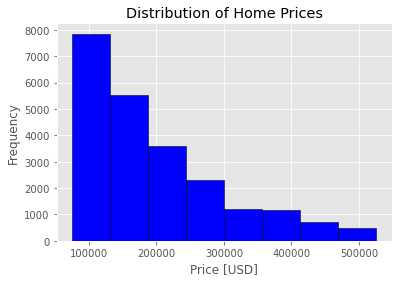

In [66]:
plt.hist(df["price_usd"],bins= 8,color ='blue',edgecolor = 'black')
plt.xlabel("Price [USD]")
plt.ylabel("Frequency")
plt.title("Distribution of Home Prices");

- The histogram of price_usd shows a right-skewed distribution, with most properties priced below $250,000 and there are a few properties priced at $300,000 and above hence pulling the mean price to that direction

- This suggests that while affordable homes are common, some regions may contain significantly higher-priced properties(outliers), pulling up the mean.

# `` 3.Home Size Distribution (Boxplot)``

## Lets create a horizontal boxplot of "area_m2"  to see the distribution of home sizes

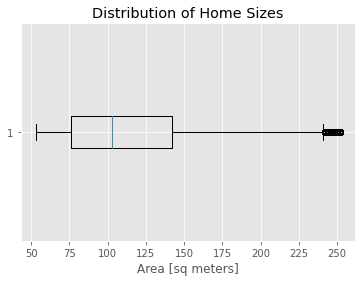

In [67]:
plt.boxplot(df["area_m2"],vert = False)
plt.xlabel("Area [sq meters]")
plt.title("Distribution of Home Sizes");

- The distribution of homesizes is also skewed to the right
- The boxplot of area_m2 shows a wide range in home sizes, with outliers indicating larger properties

- Differences in average property size may correlate with regional pricing

- **Both the home price and home size have a right skewed distribution**

In [68]:
df

,property_type,region,area_m2,price_usd,lat,lon,state
1,apartment,Northeast,110.0,187230.850000,-9.644305,-35.708814,Alagoas
2,apartment,Northeast,65.0,81133.370000,-9.643093,-35.704840,Alagoas
3,house,Northeast,211.0,154465.450000,-9.622703,-35.729795,Alagoas
4,apartment,Northeast,99.0,146013.200000,-9.622837,-35.719556,Alagoas
5,apartment,Northeast,55.0,101416.710000,-9.654955,-35.700227,Alagoas
...,...,...,...,...,...,...,...
12828,house,Southeast,180.0,131414.921630,-23.595098,-46.796448,São Paulo
12829,house,Southeast,250.0,134543.852665,-23.587495,-46.559401,São Paulo
12830,apartment,Southeast,55.0,79121.880878,-23.522029,-46.189290,São Paulo
12831,apartment,Southeast,57.0,100125.655172,-23.526443,-46.529182,São Paulo


# Lets look at the mean home price in each region in Brazil, sorted from smallest to largest

In [69]:
mean_price_by_region = df.groupby("region")["price_usd"].mean()
mean_price_by_region


region
Central-West    178596.283663
North           181308.958207
Northeast       185422.985441
South           189012.345265
Southeast       208996.762778
Name: price_usd, dtype: float64

# Plot the mean  home price  using a bar chart

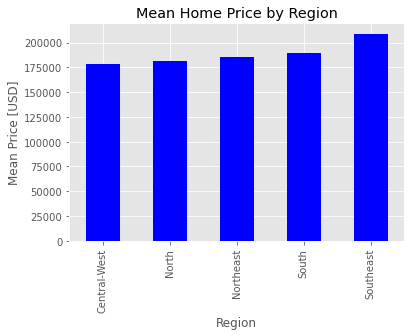

In [70]:
# Using pandas to plot
mean_price_by_region.plot(
        kind ='bar',
        xlabel ="Region",
        ylabel ="Mean Price [USD]",
        title= "Mean Home Price by Region",
        color = "blue");

- Southeast region has the highest mean price(expensive)  of about ($208996.76)
- Central-West region has the lowest mean price  of about ($178596.28)
- The price difference between Southeast and Central-West is significant (~$30,400), indicating regional disparities in property values and prices

# Conclusion
- There are notable regional differences in the Brazilian real estate market:

- Properties in the Southeast and South are generally more expensive, possibly due to greater economic activity and urbanization

- The Central-West is more affordable on average, indicating regional inequality in housing prices

## **OBJECTIVE 2**
- Is there  a relationship between the southern Brazil  home size and price, similar to what we saw with housing in some states in Mexico?

### Let's  focus on  the southern region of Brazil, and look at the relationship between home size and price

##### Create a DataFrame df_south that contains all the homes from df that are in the "South" region

In [71]:
# count the unique regions
df["region"].value_counts()

Southeast       8533
South           7821
Northeast       4794
Central-West    1387
North            309
Name: region, dtype: int64

In [72]:
# Filter out regions to only have the south region
df_south = df[df['region']== "South"]
df_south.head()

,property_type,region,area_m2,price_usd,lat,lon,state
9305,apartment,South,127.0,296448.85,-25.455704,-49.292918,Paraná
9306,apartment,South,104.0,219996.25,-25.455704,-49.292918,Paraná
9307,apartment,South,100.0,194210.50,-25.460236,-49.293812,Paraná
9308,apartment,South,77.0,149252.94,-25.460236,-49.293812,Paraná
9309,apartment,South,73.0,144167.75,-25.460236,-49.293812,Paraná


# Count the number of unique properties in each state in df_south

In [73]:
homes_by_state = df_south["state"].value_counts()
homes_by_state

Rio Grande do Sul    2643
Santa Catarina       2634
Paraná               2544
Name: state, dtype: int64

- There are 3 states in south brazil  with Rio Grande do Sul having most properties

### Let's now plot a scatter plot showing price vs. area for the state in df_south that has the largest number of properties.

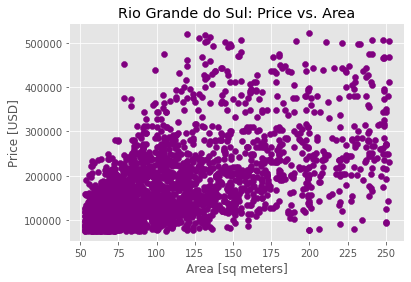

In [74]:
# Subset data
df_south_rgs = df_south[df_south['state'] == homes_by_state.idxmax()]

# Build scatter plot
plt.scatter(df_south_rgs["area_m2"],df_south_rgs ["price_usd"],color = 'purple')

# Label axes
plt.xlabel("Area [sq meters]")
plt.ylabel( "Price [USD]")

# Add title
plt.title("Rio Grande do Sul: Price vs. Area");

- There is a positive correlation between the Area(home size) and the price .As the home size increases the price of that home also increases
- Lets  acertain this by calculating the correlation of the sothern states' area_m2 and price_usd

 - Lets create a dictionary south_states_corr, where the keys are the names of the three states in the "South" region of Brazil, and their associated values are the correlation coefficient between "area_m2" and "price_usd" in that state

As an example, here's a dictionary with the states and correlation coefficients for the Southeast region. Since you're looking at a different region, the states and coefficients will be different, but the structure of the dictionary will be the same.

{'Espírito Santo': 0.6311332554173303,
 'Minas Gerais': 0.5830029036378931,
 'Rio de Janeiro': 0.4554077103515366,
 'São Paulo': 0.45882050624839366}

In [75]:
south_states_corr = {state: df_south[df_south['state'] == state]['area_m2'].corr(df_south[df_south['state'] == state]['price_usd']) for state in df_south['state'].unique()}

south_states_corr

{'Paraná': 0.5436659935502657,
 'Rio Grande do Sul': 0.5773267433717684,
 'Santa Catarina': 0.5068121776366781}

All three states in south Brazil show a moderate positive correlation between area_m2 (home size) and price_usd (price)

The values are:

Paraná: 0.54

Rio Grande do Sul: 0.58

Santa Catarina: 0.51

These numbers indicate that larger homes tend to cost more in each of these states, with the relationship being consistently moderate across the South.

- *Objective 2: Is there  a relationship between the southern Brazil  home size and price, similar to what we saw with housing in some states in Mexico?*

- Confirmed.There is a consistent, moderate positive correlation between home size and price across the southern states of Brazil.
- This supports the idea that as area increases, price also increases, similar to what you may have observed in some Mexican states.

**Recommendations**
- **Focus Expansion in High-Density States**
In both Mexico and Brazil, certain states showed a significantly higher number of property listings. For instance, Mexico City and the State of Mexico were most represented in the Mexican dataset, while São Paulo and Rio de Janeiro led in Brazil. These high-density states likely reflect higher market activity or interest and are ideal targets for expansion or further market research.

- **Prioritize Affordable Regions for Investment Opportunities**
The analysis shows variations in average property prices across regions. In Brazil, for example, the Southeast region had the highest mean home prices, while the Central-West had the lowest. Investors or developers looking for cost-effective entry into the market could prioritize lower-priced regions with room for growth or development.

- **Tailor Marketing and Development by Regional Property Size Trends**
The boxplots and descriptive statistics revealed variability in average property sizes. In some regions, properties tend to be larger but not necessarily more expensive. These insights can inform targeted housing designs (e.g., compact urban housing vs. larger suburban homes) and region-specific marketing strategies based on consumer preferences and space expectations.

## Conclusion

- **Regional Differences**: Both Mexico and Brazil show significant variation in real estate activity across states and regions. In Brazil, the Southeast region has the highest mean home prices.
- **Most Active States**: Certain states dominate in listing frequency, reflecting real estate market concentration in urban centers.
- **Property Sizes and Prices**: Price and area distributions show skewed patterns with clear outliers, indicating a mix of affordable and luxury housing. Brazil exhibits a slightly higher average price compared to Mexico.

These insights can help stakeholders make informed decisions regarding where to invest, develop, or target real estate marketing strategies.

